Task 3P: Working with numpy Matrices (Multidimensional Data)

Vishal Shah student id: s223623935

s223623935@deakin.edu.au

The given task expects us to use male and female body measures for computing BMI and comparing them for each gender. Also, it expects us to find most correlational measures that highly affect positively /negatively BMI measure.

1. From https://github.com/gagolews/teaching-data/tree/master/marek, we download the two following excerpts from the National Health and Nutrition Examination Survey (NHANES dataset) that give body measurements of adult males and females.\
• nhanes_adult_male_bmx_2020.csv,\
• nhanes_adult_female_bmx_2020.csv.

2. We read the data as numpy matrices named male and female using numpy.genfromtxt. 

 Each matrix consists of seven columns:
 1. weight (kg),
 2. standing height (cm),
 3. upper arm length (cm),
 4. upper leg length (cm),
 5. arm circumference (cm),
 6. hip circumference (cm),
 7. waist circumference (cm).

In [1]:
import numpy as np # import numpy library
#upload file data into array
data_male = np.genfromtxt('C:\\Users\\Vishal.shah.LAMINAAR\\OneDrive - Laminaar Aviation Infotech (India) Private Limited\\Desktop\\MDS\\SIG731- Data Wrangling Content\\tasks\\3P\\nhanes_adult_male_bmx_2020.csv', delimiter=',')[1:, :]  # skip first row (column names)
# view first 3 rows of array
data_male[:3]

array([[ 98.8, 182.3,  42. ,  40.1,  38.2, 108.2, 120.4],
       [ 74.3, 184.2,  41.1,  41. ,  30.2,  94.5,  86.8],
       [103.7, 185.3,  47. ,  44. ,  32. , 107.8, 109.6]])

3. Adding bmi related column names:  "weight", "standing height","upper arm len","upper leg len","arm circ","hip circ","waist circ"

In [2]:
data_male = np.array(data_male,{'names':['weight',"standing height","upper arm len","upper leg len","arm circ","hip circ","waist circ"], 'formats':[np.floating, np.floating,np.floating, np.floating,np.floating, np.floating, np.floating]})

C:\Users\Vishal.shah.LAMINAAR\AppData\Local\Temp\ipykernel_29684\418191467.py:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  data_male = np.array(data_male,{'names':['weight',"standing height","upper arm len","upper leg len","arm circ","hip circ","waist circ"], 'formats':[np.floating, np.floating,np.floating, np.floating,np.floating, np.floating, np.floating]})


In [3]:
# check array 7 variables and 1 row
data_male[:7][:1]

array([[( 98.8,  98.8,  98.8,  98.8,  98.8,  98.8,  98.8),
        (182.3, 182.3, 182.3, 182.3, 182.3, 182.3, 182.3),
        ( 42. ,  42. ,  42. ,  42. ,  42. ,  42. ,  42. ),
        ( 40.1,  40.1,  40.1,  40.1,  40.1,  40.1,  40.1),
        ( 38.2,  38.2,  38.2,  38.2,  38.2,  38.2,  38.2),
        (108.2, 108.2, 108.2, 108.2, 108.2, 108.2, 108.2),
        (120.4, 120.4, 120.4, 120.4, 120.4, 120.4, 120.4)]],
      dtype=[('weight', '<f8'), ('standing height', '<f8'), ('upper arm len', '<f8'), ('upper leg len', '<f8'), ('arm circ', '<f8'), ('hip circ', '<f8'), ('waist circ', '<f8')])

In [4]:
#upload file data into array
data_female = np.genfromtxt('C:\\Users\\Vishal.shah.LAMINAAR\\OneDrive - Laminaar Aviation Infotech (India) Private Limited\\Desktop\\MDS\\SIG731- Data Wrangling Content\\tasks\\3P\\nhanes_adult_female_bmx_2020.csv', delimiter=',')[1:, :]  # skip first row (column names)
# check array 7 variables and 1 row
data_male[:7][:1]

array([[( 98.8,  98.8,  98.8,  98.8,  98.8,  98.8,  98.8),
        (182.3, 182.3, 182.3, 182.3, 182.3, 182.3, 182.3),
        ( 42. ,  42. ,  42. ,  42. ,  42. ,  42. ,  42. ),
        ( 40.1,  40.1,  40.1,  40.1,  40.1,  40.1,  40.1),
        ( 38.2,  38.2,  38.2,  38.2,  38.2,  38.2,  38.2),
        (108.2, 108.2, 108.2, 108.2, 108.2, 108.2, 108.2),
        (120.4, 120.4, 120.4, 120.4, 120.4, 120.4, 120.4)]],
      dtype=[('weight', '<f8'), ('standing height', '<f8'), ('upper arm len', '<f8'), ('upper leg len', '<f8'), ('arm circ', '<f8'), ('hip circ', '<f8'), ('waist circ', '<f8')])

3.Add bmi related column names:  "weight", "standing height","upper arm len","upper leg len","arm circ","hip circ","waist circ"

In [5]:
data_female = np.array(data_female,{'names':['weight',"standing height","upper arm len","upper leg len","arm circ","hip circ","waist circ"], 'formats':[np.floating, np.floating,np.floating, np.floating,np.floating, np.floating, np.floating]})
# check weight array
data_female['weight'][:,0]

C:\Users\Vishal.shah.LAMINAAR\AppData\Local\Temp\ipykernel_29684\3147726802.py:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  data_female = np.array(data_female,{'names':['weight',"standing height","upper arm len","upper leg len","arm circ","hip circ","waist circ"], 'formats':[np.floating, np.floating,np.floating, np.floating,np.floating, np.floating, np.floating]})


array([97.1, 91.1, 73. , ..., 73. , 78.6, 82.8])

4. We add 8th column as BMI for male and female  

*BMI = Weight (kgs) / Height (metres) ^2*         

In [6]:
bmi_male = (data_male['weight'][:,0]/ (np.multiply(data_male['standing height'][:,1],0.01)*np.multiply(data_male['standing height'][:,1],0.01)))
# calculate bmi for male dataset
bmi_male

array([29.72922633, 21.89825769, 30.20145858, ..., 38.22950988,
       25.54876826, 21.27868122])

In [7]:
bmi_female = (data_female['weight'][:,0]/ (np.multiply(data_female['standing height'][:,1],0.01)*np.multiply(data_female['standing height'][:,1],0.01)))
# calculate bmi for female dataset
bmi_female

array([37.83504078, 39.06972037, 28.09265496, ..., 28.65873958,
       27.68361084, 37.90368801])

5. Using Male BMI and Female BMI we plot histogram and look at distribution

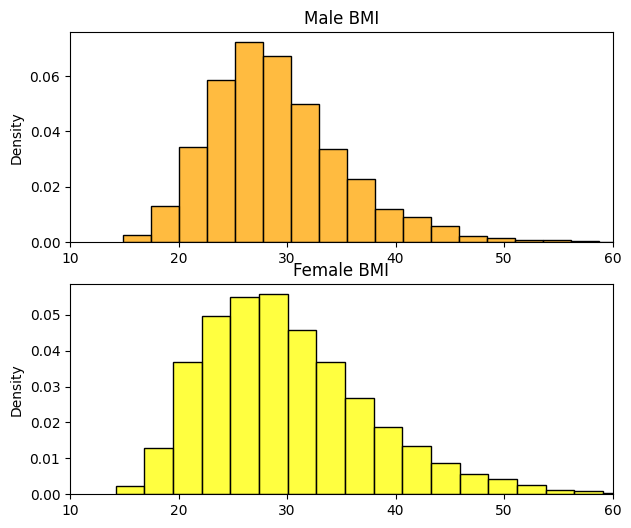

In [8]:
import matplotlib.pyplot as plt                                       #import matplotlib.pyplot
import seaborn as sns                                                 #import seaborn library
plt.figure(figsize=(7,6))                                             # resize height and width of plot
plt.subplot(211)                                                      # 2= row, 1= column, 1=1st graph
plt.title('Male BMI')                                                 # plot title
sns.histplot(bmi_male,bins=20,stat="density", color = 'orange')       # number of bins are selected 20 , colored orange
plt.xlim(left=10, right=60)                                           # limit right and left side x-axis on the plot 

plt.subplot(212)                                                      # 2= row, 1= column, 2=2nd graph
plt.title('Female BMI')                                               # plot title
sns.histplot(bmi_female,bins=20,stat="density",color= 'yellow')       # number of bins are selected 20 , colored orange
plt.xlim(left=10, right=60)                                           # limit right and left side x-axis on the plot 
plt.show()

*As per given distribution it is abservable that Male and Female BMI show similar histogram pattern. Most density is between 20 to 35 BMI. Also,both dataset are positive skewed.*

6.Using matplotlib.pyplot.boxplot, we draw a box-and-whisker plot giving the male and female BMIs, with two boxes one below another (on one plot) so that they can be compared to each other. 

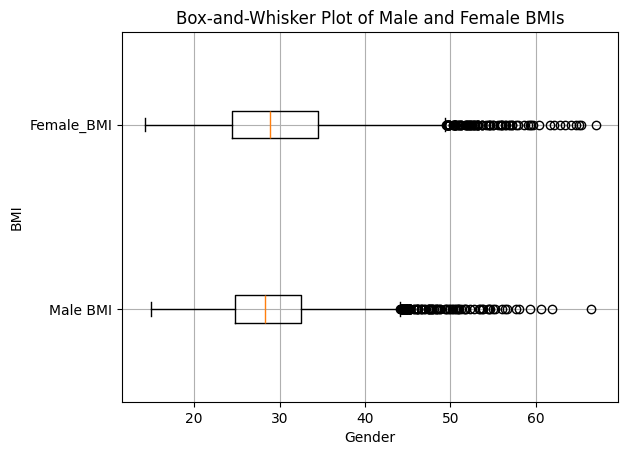

In [9]:
# Create a box-and-whisker plot
plt.boxplot([bmi_male,bmi_female], labels=['Male BMI', 'Female_BMI'], vert= False)
# Add a title to the plot
plt.title('Box-and-Whisker Plot of Male and Female BMIs')

# Label the x-axis
plt.xlabel('Gender')

# Label the y-axis
plt.ylabel('BMI')

# Enable grid lines on the plot
plt.grid(True)

# Display the plot
plt.show()

*It is observable that the Male BMI median values are slightly lower than Female BMI median values. As there are many outliers in the given sample more reliable value for comparison is median.*

7.We compute the basic numerical aggregates of the male and female BMIs.

In [10]:
import scipy.stats as sts

print("Summary Statistics for Male BMI\n")# Print a header for the summary statistics
mean_values1 = np.mean(bmi_male)# Calculate and print the mean of male BMI
median_values1 = np.median(bmi_male)# Calculate and print the median of male BMI
std_deviation1 = np.std(bmi_male)# Calculate and print the standard deviation of male BMI
min_values1 = np.min(bmi_male)# Calculate and print the minimum value of male BMI
max_values1 = np.max(bmi_male)# Calculate and print the maximum value of male BMI
iqr_values1 = np.quantile(bmi_male, 0.75) - np.quantile(bmi_male, 0.25)# Calculate and print the interquartile range (IQR) of male BMI
skew_values1 = sts.skew(bmi_male)# Calculate and print the skewness of male BMI using scipy.stats

# Doing similar steps for female bmi data.
mean_values2 = np.mean(bmi_female)
median_values2 = np.median(bmi_female)
std_deviation2 = np.std(bmi_female)
min_values2 = np.min(bmi_female)
max_values2 = np.max(bmi_female)
iqr_values2 = np.quantile(bmi_female,0.75) - np.quantile(bmi_female,0.25)
skew_values2 = sts.skew(bmi_female)

# Display the results
print("Male_BMI_Mean values:", round(mean_values1,2) , "      Female_BMI_Mean values:", round(mean_values2,2))
print("Male_BMI_Median values:", round(median_values1,2), "    Female_BMI_Median values:", round(median_values2,2))
print("Male_BMI_Min values:", round(min_values1,2),"       Female_BMI_Min values:", round(min_values2,2))
print("Male_BMI_Max values:", round(max_values1,2),"        Female_BMI_Max values:", round(max_values2,2))
print("Male_BMI_Standard deviation:", round(std_deviation1,2),"Female_BMI_Standard deviation:", round(std_deviation2,2))
print("Male_BMI_IQR:", round(iqr_values1,2),"               Female_BMI_IQR:", round(iqr_values2,2))
print("Male_BMI_Skew values:", round(skew_values1,2),"       Female_BMI_Skew values:", round(skew_values2,2))

Summary Statistics for Male BMI

Male_BMI_Mean values: 29.14       Female_BMI_Mean values: 30.1
Male_BMI_Median values: 28.27     Female_BMI_Median values: 28.89
Male_BMI_Min values: 14.91        Female_BMI_Min values: 14.2
Male_BMI_Max values: 66.5         Female_BMI_Max values: 67.04
Male_BMI_Standard deviation: 6.31 Female_BMI_Standard deviation: 7.76
Male_BMI_IQR: 7.73                Female_BMI_IQR: 10.01
Male_BMI_Skew values: 0.97        Female_BMI_Skew values: 0.92


*As the mean values are affected by outliers, comparison of median show similar median for both genders. 50% of datapoints in Male BMI is highly concenterated between 25 to 32 BMI values. While 50% Female BMI datapoints are between 24 to 36 BMI values shows more dispersion. While both genders dataset are right skewed, Male BMI values are slightly more skewed in comparison.* 

8.We plot a scatterplot matrix (a pairplot) for the male heights, weights, waist circumferences, hip circumferences, and BMIs (these five columns only)

C:\Users\Vishal.shah.LAMINAAR\AppData\Local\Temp\ipykernel_29684\4063083992.py:25: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\Vishal.shah.LAMINAAR\AppData\Local\Temp\ipykernel_29684\4063083992.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i, j].scatter(a[i], a[j], cmap='viridis', edgecolors='c')
C:\Users\Vishal.shah.LAMINAAR\AppData\Local\Temp\ipykernel_29684\4063083992.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


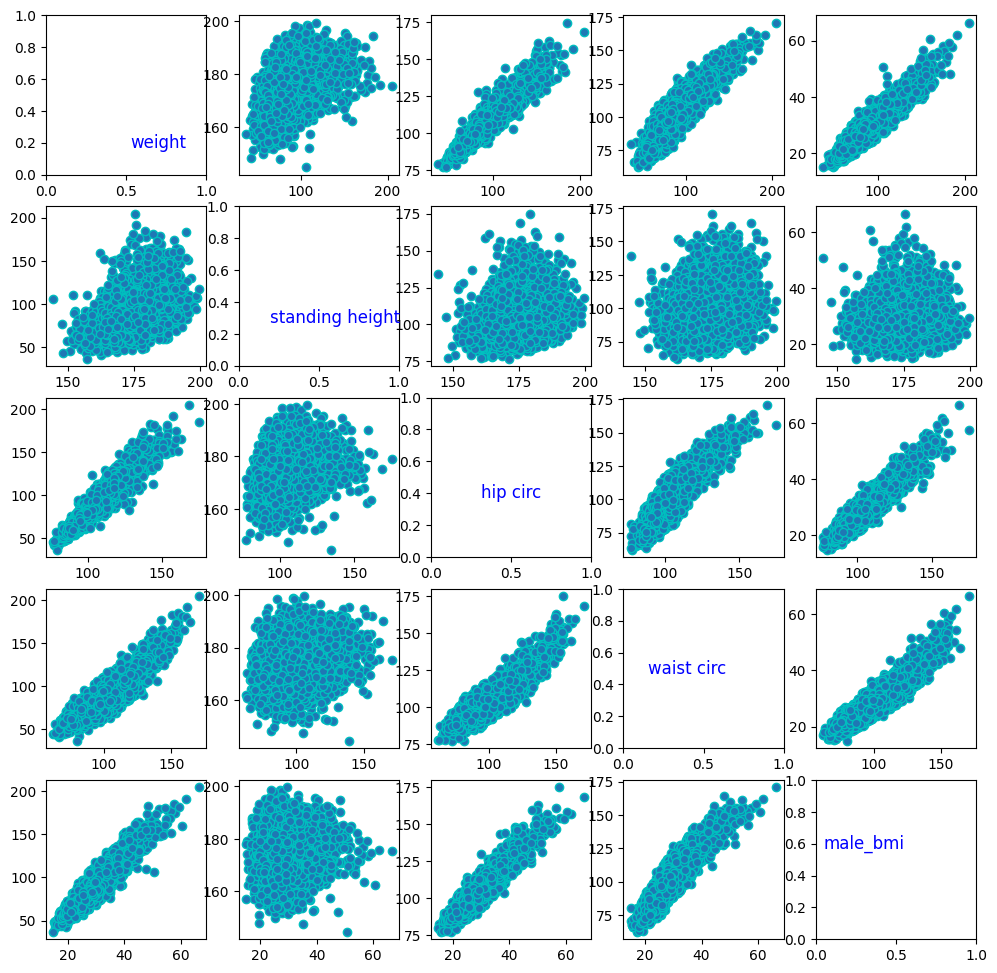

In [11]:
# Selecting specific columns from the 'data_male' DataFrame and creating a list 'a'
a = [data_male['weight'][:, 0], data_male['standing height'][:, 1],
     data_male['hip circ'][:, 5], data_male['waist circ'][:, 6], bmi_male]

# Creating subplots with a 5x5 grid and a specified figure size
fig, axes = plt.subplots(5, 5, figsize=(12, 12))

# List of labels for the variables in 'a'
z = ['weight', 'standing height', 'hip circ', 'waist circ', 'male_bmi']

# Looping through each pair of variables in 'a' to create scatter plots
for i in range(0, len(a)):
    for j in range(0, len(a)):
        # Plotting scatter plots for different pairs of variables
        if i != j:
            axes[i, j].scatter(a[i], a[j], cmap='viridis', edgecolors='c')
            plt.tight_layout()
        # Adding labels to the diagonal subplots
        elif i == j:
            # Calculating the text coordinates for labels
            x1 = -4.1 + (0.1 * i) + i
            y1 = 5 - (0.1 * j) - j
            # Adding text labels to the diagonal subplots
            plt.text(x1, y1, s=z[i], ha='center', va='center', fontsize=12, color='blue')
            plt.tight_layout()
            

*We can notice for male dataset,a positive relationships between weight,hip circ, waist circ , male_bmi with each other.*

9.We compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables considered earlier and create heatmap.

In [26]:
correlation_matrix = np.corrcoef(np.vstack(a[0]),np.vstack(a[1]), rowvar=False)
correlation_matrix

array([[1.        , 0.43415325],
       [0.43415325, 1.        ]])

In [29]:
correlation_matrix = np.corrcoef(np.vstack([a[0],a[1]]).T, rowvar=False)
correlation_matrix

array([[1.        , 0.43415325],
       [0.43415325, 1.        ]])

In [12]:
np.vstack([a[0], a[1], a[2], a[3], a[4]])

array([[ 98.8       ,  74.3       , 103.7       , ..., 108.8       ,
         79.5       ,  59.7       ],
       [182.3       , 184.2       , 185.3       , ..., 168.7       ,
        176.4       , 167.5       ],
       [108.2       ,  94.5       , 107.8       , ..., 118.        ,
         99.8       ,  90.5       ],
       [120.4       ,  86.8       , 109.6       , ..., 114.7       ,
         97.1       ,  86.9       ],
       [ 29.72922633,  21.89825769,  30.20145858, ...,  38.22950988,
         25.54876826,  21.27868122]])

In [13]:
matrix = np.vstack([a[0], a[1], a[2], a[3], a[4]]).T
matrix

array([[ 98.8       , 182.3       , 108.2       , 120.4       ,
         29.72922633],
       [ 74.3       , 184.2       ,  94.5       ,  86.8       ,
         21.89825769],
       [103.7       , 185.3       , 107.8       , 109.6       ,
         30.20145858],
       ...,
       [108.8       , 168.7       , 118.        , 114.7       ,
         38.22950988],
       [ 79.5       , 176.4       ,  99.8       ,  97.1       ,
         25.54876826],
       [ 59.7       , 167.5       ,  90.5       ,  86.9       ,
         21.27868122]])

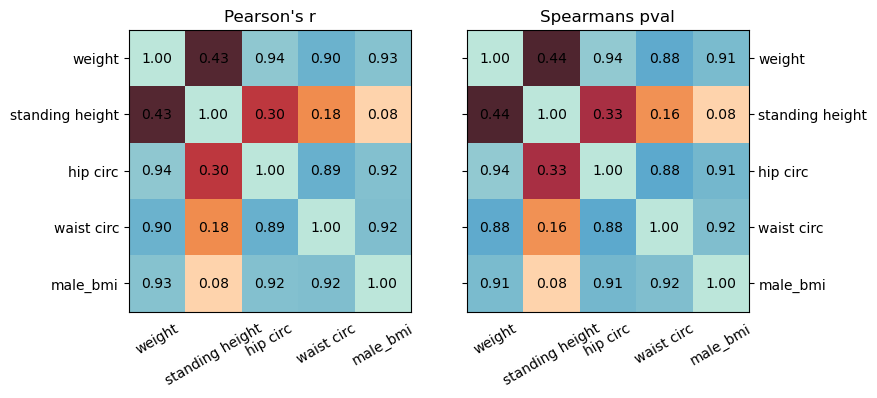

In [12]:
# Create a matrix by stacking the variables in 'a' horizontally and then transposing
matrix = np.vstack([a[0], a[1], a[2], a[3], a[4]]).T

# Calculate the Pearson correlation matrix
correlation_matrix = np.corrcoef(matrix, rowvar=False)

# Calculate the Spearman correlation matrix using scipy.stats.spearmanr
from scipy.stats import spearmanr
spearman_corr, pval = spearmanr(matrix)

# Create a heatmap using Pearson correlation
plt.figure(figsize=(8, 8))

# Plotting the Pearson correlation heatmap
plt.subplot(1, 2, 1)  # 1=row, 2=column, 1=1st graph

plt.imshow(correlation_matrix, cmap='icefire_r', interpolation='nearest')

# Annotate the heatmap with Pearson correlation coefficients
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.annotate(f'{correlation_matrix[i, j]:.2f}',
                     xy=(j, i),
                     ha='center',
                     va='center')

# Customize x-axis ticks and labels
plt.xticks(np.arange(len(z)), labels=z, rotation=30)
plt.tick_params(axis="x", which="both", labelbottom=True, bottom=False, top=False)

# Customize y-axis ticks and labels
plt.yticks(np.arange(len(z)), labels=z)

# Add a title to the heatmap
plt.title('Pearson\'s r')


# Using Spearman's correlation

# Create a heatmap using Matplotlib
# plt.figure(figsize=(8,8))
plt.subplot(1,2,2)                                                         #1= row, 2= column, 2=2nd graph

plt.imshow(spearman_corr, cmap='icefire_r', interpolation='nearest')

# Annotate the heatmap with correlation coefficients
for i in range(spearman_corr.shape[0]):
    for j in range(spearman_corr.shape[1]):
        plt.annotate(f'{spearman_corr[i, j]:.2f}',
                     xy=(j, i),
                     ha='center',
                     va='center',)
# Customize x-axis ticks and labels        
plt.xticks(np.arange(len(z)), labels=z, rotation=30,)
plt.tick_params(axis="x", which="both",labelbottom=True,bottom=False, top=False)
plt.title('Spearmans pval')
plt.tick_params(axis="y", right=True,labelright  =True, labelleft = False)
# Customize y-axis ticks and labels
plt.yticks(np.arange(len(z)), labels=z)        
plt.show()


10.As visualized using scatterplot for male dataset, correlation show male_bmi has high correlation with weight, hip circ, waist circ. While minimal or no relation with standing height.

References:

Python, R. (n.d.). NumPy, SciPy, and Pandas: Correlation With Python – Real Python. [online] realpython.com. Available at: https://realpython.com/numpy-scipy-pandas-correlation-python/#spearman-correlation-coefficient.



Stack Overflow. (n.d.). How to get correlation of two vectors in python. [online] Available at: https://stackoverflow.com/questions/19428029/how-to-get-correlation-of-two-vectors-in-python [Accessed 18 Jan. 2024].

